In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [14]:
candy = pd.read_csv("C:/Users/진현킴/Downloads/candy-data.csv")

In [15]:
candy

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,WertherÕs Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


In [16]:
candy.dropna()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,WertherÕs Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


In [17]:
candy.isnull().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

Text(0.5, 1.0, 'class')

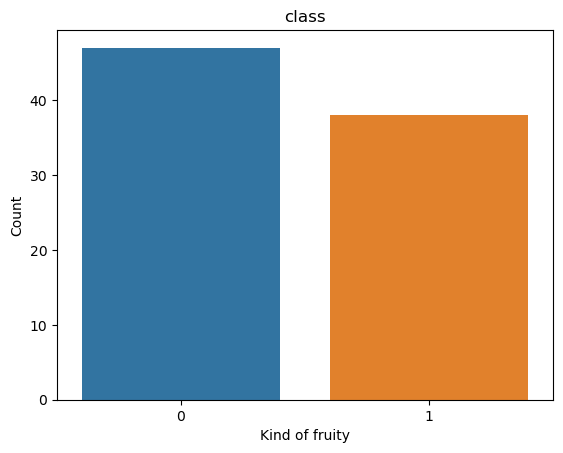

In [20]:
import seaborn as sns
sns.countplot(data = candy, x="fruity")
plt.xlabel("Kind of fruity")
plt.ylabel("Count")
plt.title("class")

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in candy.columns :
    candy[i] = le.fit_transform(candy[i])

In [24]:
candy

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,0,1,0,1,0,0,1,0,1,0,25,24,71
1,1,1,0,0,0,1,0,0,1,0,23,18,73
2,44,0,0,0,0,0,0,0,0,0,0,8,7
3,45,0,0,0,0,0,0,0,0,0,0,18,37
4,2,0,1,0,0,0,0,0,0,0,30,18,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,80,0,1,0,0,0,0,0,0,0,11,8,34
81,81,0,1,0,0,0,0,1,0,0,4,8,20
82,82,0,1,0,0,0,0,0,0,1,14,13,33
83,83,0,0,1,0,0,0,1,0,0,9,11,27


In [31]:
X = candy.iloc[:,0:10].values
y = candy['pricepercent']

In [32]:
y

0     24
1     18
2      8
3     18
4     18
      ..
80     8
81     8
82    13
83    11
84    23
Name: pricepercent, Length: 85, dtype: int64

In [33]:
from sklearn.preprocessing import LabelEncoder
## from keras.utils import to_categorical

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
## y_one_hot = to_categorical(y_encoded, num_classes=2)
Y = pd.get_dummies(y_encoded).values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [34]:
print(y_train.shape)
print(y_test.shape)

(68, 29)
(17, 29)


In [35]:
import numpy as np

mean = np.mean(X_train, axis = 0)

std = np.std(X_train, axis = 0)

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [36]:
print(np.any(np.isnan(X_train)))
print(np.any(np.isnan(X_test)))
print(np.any(np.isinf(X_train)))
print(np.any(np.isinf(X_test)))

False
False
False
False


In [37]:
X_train = pd.DataFrame(X_train).fillna(0).values
X_test = pd.DataFrame(X_test).fillna(0).values
print(np.any(np.isnan(X_train)))
print(np.any(np.isnan(X_test)))
print(np.any(np.isinf(X_train)))
print(np.any(np.isinf(X_test)))

False
False
False
False


In [40]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(32, activation = 'relu', input_shape = (10,)))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'softmax')) 

model.compile(optimizer = 'rmsprop', loss='mse', metrics = ['mse'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                352       
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 897
Trainable params: 897
Non-trainable params: 0
_________________________________________________________________


In [41]:
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/100
3/3 [==============================] - 2s 260ms/step - loss: 0.9655 - mse: 0.9655 - val_loss: 0.9655 - val_mse: 0.9655
Epoch 2/100
3/3 [==============================] - 0s 42ms/step - loss: 0.9655 - mse: 0.9655 - val_loss: 0.9655 - val_mse: 0.9655
Epoch 3/100
3/3 [==============================] - 0s 39ms/step - loss: 0.9655 - mse: 0.9655 - val_loss: 0.9655 - val_mse: 0.9655
Epoch 4/100
3/3 [==============================] - 0s 40ms/step - loss: 0.9655 - mse: 0.9655 - val_loss: 0.9655 - val_mse: 0.9655
Epoch 5/100
3/3 [==============================] - 0s 39ms/step - loss: 0.9655 - mse: 0.9655 - val_loss: 0.9655 - val_mse: 0.9655
Epoch 6/100
3/3 [==============================] - 0s 41ms/step - loss: 0.9655 - mse: 0.9655 - val_loss: 0.9655 - val_mse: 0.9655
Epoch 7/100
3/3 [==============================] - 0s 43ms/step - loss: 0.9655 - mse: 0.9655 - val_loss: 0.9655 - val_mse: 0.9655
Epoch 8/100
3/3 [==============================] - 0s 44ms/step - loss: 0.9655 - mse: 0.9

3/3 [==============================] - 0s 43ms/step - loss: 0.9655 - mse: 0.9655 - val_loss: 0.9655 - val_mse: 0.9655
Epoch 64/100
3/3 [==============================] - 0s 43ms/step - loss: 0.9655 - mse: 0.9655 - val_loss: 0.9655 - val_mse: 0.9655
Epoch 65/100
3/3 [==============================] - 0s 41ms/step - loss: 0.9655 - mse: 0.9655 - val_loss: 0.9655 - val_mse: 0.9655
Epoch 66/100
3/3 [==============================] - 0s 41ms/step - loss: 0.9655 - mse: 0.9655 - val_loss: 0.9655 - val_mse: 0.9655
Epoch 67/100
3/3 [==============================] - 0s 42ms/step - loss: 0.9655 - mse: 0.9655 - val_loss: 0.9655 - val_mse: 0.9655
Epoch 68/100
3/3 [==============================] - 0s 39ms/step - loss: 0.9655 - mse: 0.9655 - val_loss: 0.9655 - val_mse: 0.9655
Epoch 69/100
3/3 [==============================] - 0s 39ms/step - loss: 0.9655 - mse: 0.9655 - val_loss: 0.9655 - val_mse: 0.9655
Epoch 70/100
3/3 [==============================] - 0s 43ms/step - loss: 0.9655 - mse: 0.9655 - 

In [42]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 79ms/step - loss: 0.9655 - mse: 0.9655


[0.9655172824859619, 0.9655172824859619]

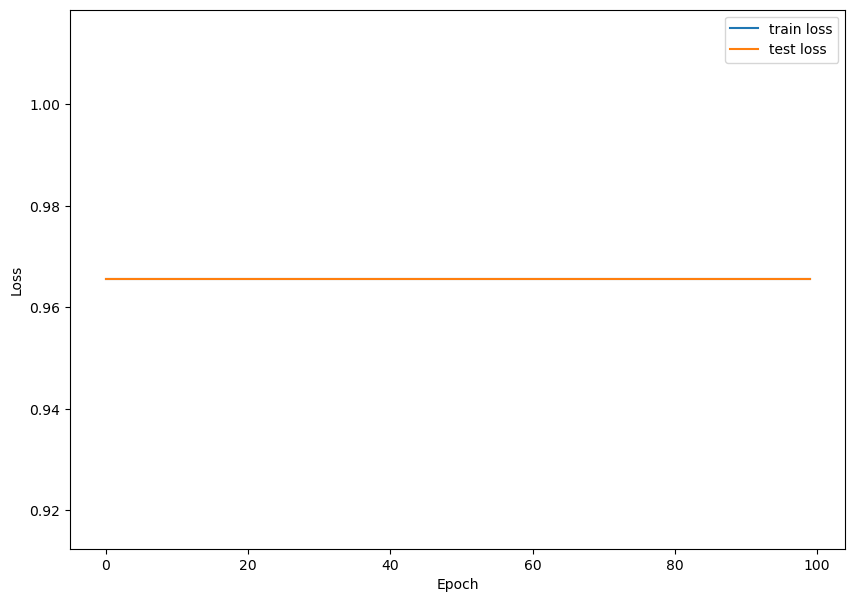

In [43]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

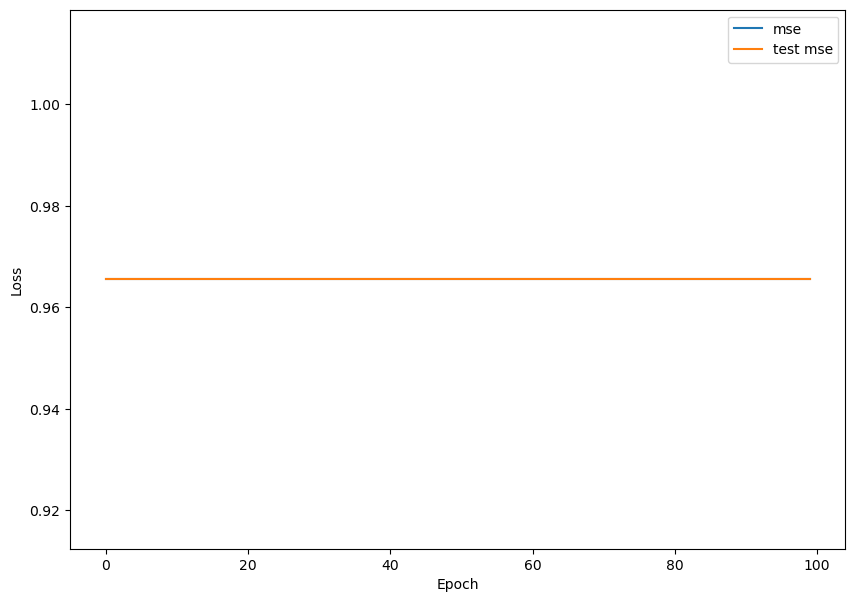

In [45]:
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['mse'], label='mse')
plt.plot(range(N_EPOCHS), history.history['val_mse'], label='test mse')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()